<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sp
from src import soporte_nulos as sn
from src import soporte_encoding as se
from src import soporte_outliers as so
from src import soporte_ajuste as sa
from src import soporte_1 as s1
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import seaborn as sns
from scipy.stats import chi2_contingency
from src import  soporte_ajuste_logistica as sal

In [2]:
df = pd.read_pickle("datos/financial_data_prepocesamiento.pkl")

In [3]:
df

,is_fraudulent,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel,transaction_id_robust,customer_id_robust,merchant_id_robust,amount_robust,card_type_robust,location_robust,purchase_category_robust,customer_age_robust,transaction_description_robust
0,0,1.00,0.00,0.00,0.00,0.00,0.00,-1.07,0.65,-0.49,0.18,5.85,-0.11,0.29,-0.04,0.23
1,1,0.00,0.00,1.00,0.00,0.00,0.00,-1.07,-0.80,0.06,-0.65,1.00,0.57,-0.71,0.71,0.58
2,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.00,1.00,-1.07,0.93,-0.28,0.57,0.00,2.08,-0.22,0.62,0.38
4,1,0.00,0.00,0.00,0.00,1.00,0.00,-1.07,-0.35,0.70,-0.65,5.85,-0.11,0.00,-0.33,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.00,0.00,0.00,1.00,0.00,0.00,1.08,0.09,-0.57,0.85,5.85,-0.11,-0.90,-0.33,0.78
9996,0,0.00,0.00,0.00,0.00,1.00,0.00,1.08,0.02,-0.51,-1.04,5.85,-0.45,0.00,-0.08,0.33
9997,0,0.00,0.00,1.00,0.00,0.00,0.00,1.08,-0.24,-0.34,0.30,-3.73,1.53,-0.71,-0.33,-0.96
9998,1,0.00,0.00,0.00,0.00,1.00,0.00,1.08,-0.93,-0.66,-0.45,1.00,0.75,0.00,0.54,-1.25


In [4]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

,train,test
accuracy,0.58,0.58
precision,0.57,0.58
recall,0.58,0.58
f1,0.57,0.58
kappa,0.14,0.16


(2000,)
[[489 445]
 [392 674]]


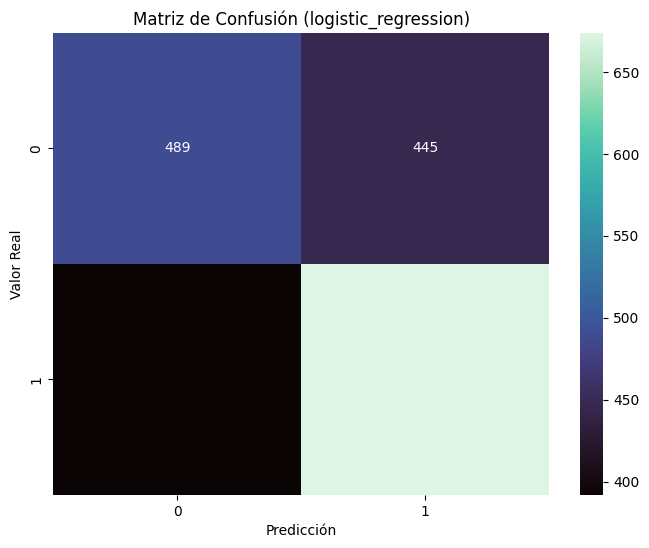

In [5]:
logistica.plot_matriz_confusion("logistic_regression")